## 1. Connecting to PostgreSQL Database and Verifying Data Existence
- We'll use SQLAlchemy to establish a connection to query
- It should connect to the 'social_media_db' we create from the service in the docker-compose.yml
- In the data pipeline section, we created 3 tables: channels, videos, and comments
- To confirm we successfully load all the YouTube social media data, we query counting and print them for verifying Airflow ETL pipeline works.


In [1]:
#source .venv/bin/activate
#jupyter lab

### Define Credentials

In [2]:
from sqlalchemy import create_engine, text
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec
from scipy.stats import pearsonr

# Set professional corporate style
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
# Define database, which match the 'social_media_db' service in the docker-compose.yml.
# which Docker exposes the service on localhost and "5433:5432" in docker-compose.yml.
user = 'postgres'
password = 'postgres'
host = 'localhost' 
port = 5433         
database = 'social_media_db'

### Create Connection Engine and Test It

In [4]:
# Construct the connection string in PostgreSQL URI format.
conn_string = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}"

# Create the SQLAlchemy engine.
engine = create_engine(conn_string)  

# Test the connection 
try:
    with engine.connect() as conn:
        result = conn.execute(text("SELECT 1 AS test;"))
        test_value = result.scalar()  # Fetch single value.
    
    if test_value == 1:
        print(f"Connection successful! Connected to {database} on {host}:{port} as {user}.")
        print("Database is ready for queries.")
    else:
        print("Connection test failed unexpectedly.")
        
except Exception as e:
    print(f"Connection error: {e}")
    print("Troubleshooting: Check Docker status (`docker ps`), port forwarding, or credentials.")

Connection successful! Connected to social_media_db on localhost:5433 as postgres.
Database is ready for queries.


### Check 'channels' Table
- The channels table stores YouTube channel metadata which scratch from the ETL process
- You can see features like channel_id, title, subscriber_count
- Insight:
- based on the **"Statistical Summary"**, subscribers and view are **widely dispersed**, but the **total_videos** are similar.

In [5]:
# Define query row count for verification.
count_query = 'SELECT COUNT(*) AS total_rows FROM channels;'

# Also print the first 5 row samples from channels table.
query_channels = 'SELECT * FROM channels;'

# Use SQLAlchemy's native execution
with engine.connect() as conn:
        
    # Execute count query.
    count_result = conn.execute(text(count_query))
    total_channels = count_result.scalar()
    print(f"Total rows: {total_channels}")
    
    # print first 5 rows from channels table
    df_channels = conn.execute(text(query_channels))
    df_channels = pd.DataFrame(df_channels.fetchall(), columns=df_channels.keys())
    print(f"Shape: {df_channels.shape} (rows, columns)")
    print("\nFirst 5 rows:")
    display(df_channels.head(5))  
    
    # stats
    print("\nStatistical Summary:")
    display(df_channels.describe())
    
    print("\nMissing Values per Column:")
    display(df_channels.isnull().sum())

Total rows: 6
Shape: (6, 6) (rows, columns)

First 5 rows:


,channel_id,channel_name,views,total_videos,subscribers,updated_at
0,UC8OVLoXv7B1BdOVV44Dz3ig,Project Umbrella,1318164,236,20100,2025-11-10 06:32:58.995
1,UC7OUGIPx0HIB5HA2OSL-Zhg,MW Insurance Academe 保險為什麼,799045,1857,5400,2025-11-10 06:32:58.995
2,UCD5Lx-3KCYZzCzGF2A60STg,Bowtie Insurance 保泰人壽,52672852,338,85700,2025-11-10 06:32:58.995
3,UCFfbH3zDLa47d4nfotQ349Q,投資最容易,3317417,395,34900,2025-11-10 06:32:58.995
4,UCxQfqaw1i39eBQG1YJDbDkw,UTOPIA HK,623473,326,4170,2025-11-10 06:32:58.995



Statistical Summary:


,views,total_videos,subscribers,updated_at
count,6.000000e+00,6.00000,6.000000,6
mean,1.026350e+07,598.00000,31678.333333,2025-11-10 06:32:58.995000064
min,6.234730e+05,236.00000,4170.000000,2025-11-10 06:32:58.995000
25%,9.288248e+05,329.00000,9075.000000,2025-11-10 06:32:58.995000064
50%,2.084112e+06,366.50000,27500.000000,2025-11-10 06:32:58.995000064
75%,3.200578e+06,425.75000,38575.000000,2025-11-10 06:32:58.995000064
max,5.267285e+07,1857.00000,85700.000000,2025-11-10 06:32:58.995000
std,2.080522e+07,620.50979,30252.266306,NaN



Missing Values per Column:


channel_id      0
channel_name    0
views           0
total_videos    0
subscribers     0
updated_at      0
dtype: int64

### Check 'videos' Table
- The videos table stores all the video created from those YouTube channel, which we scratch from the ETL process
- You can see features like video_id, title, views, likes
- based on the **"Statistical Summary"**, video's views are **widely dispersed**, but the **likes** and **comments** are similar.

In [6]:
# same as above but for videos table
count_query = 'SELECT COUNT(*) AS total_rows FROM videos;'
query_videos = 'SELECT * FROM videos;'

with engine.connect() as conn:
    count_result = conn.execute(text(count_query))
    total_videos = count_result.scalar()
    print(f"Total rows: {total_videos}")

    df_videos = conn.execute(text(query_videos))
    df_videos = pd.DataFrame(df_videos.fetchall(), columns=df_videos.keys())
    #df_videos = df_videos.drop('video_duration', axis=1)
    print(f"Shape: {df_videos.shape} (rows, columns)")
    print("\nFirst rows:")
    display(df_videos.head(1))
    
    # stats
    print("\nStatistical Summary:")
    display(df_videos.describe())
    
    print("\nMissing Values per Column:")
    display(df_videos.isnull().sum())

Total rows: 3302
Shape: (3302, 9) (rows, columns)

First rows:


,video_id,channel_id,channel_name,title,published_at,view_count,like_count,comment_count,duration
0,yyZVVi07oEU,UCD5Lx-3KCYZzCzGF2A60STg,Bowtie Insurance 保泰人壽,日本藥妝店 去水腫 保健食品 = 智商稅 ？｜實測 5秒 水腫測試 皮膚凹陷 可能係 大病 ...,2025-11-06 11:01:05,15354,323,8,1227



Statistical Summary:


,published_at,view_count,like_count,comment_count,duration
count,3302,3.302000e+03,3302.000000,3302.000000,3302.000000
mean,2023-01-15 17:43:04.271653632,1.862354e+04,117.952756,13.155360,679.736826
min,2016-07-04 04:04:18,0.000000e+00,0.000000,0.000000,0.000000
25%,2021-10-24 06:00:03.249999872,6.400000e+01,1.000000,0.000000,180.250000
50%,2023-05-26 10:16:02.500000,3.070000e+02,6.000000,0.000000,523.000000
75%,2024-05-23 21:01:32,2.166000e+03,42.000000,4.000000,836.000000
max,2025-11-10 00:01:01,7.570792e+06,10541.000000,742.000000,13800.000000
std,NaN,1.762063e+05,544.080287,45.850353,804.926360



Missing Values per Column:


video_id         0
channel_id       0
channel_name     0
title            0
published_at     0
view_count       0
like_count       0
comment_count    0
duration         0
dtype: int64

### Check 'comments' Table
- The comments table stores all the comments who made from the audience form those videos, which we scratch from the ETL process
- You can see features like comment_id, text, likes, published_at per videos
- Base on the **vader_score** in the **Statistical Summary**, emotion are similar for each video.

In [7]:
# same as above but for videos table
query_comments = 'SELECT * FROM comments;'
count_query = 'SELECT COUNT(*) AS total_rows FROM comments;'

with engine.connect() as conn:
    count_result = conn.execute(text(count_query))
    total_comments = count_result.scalar()
    print(f"Total rows: {total_comments}")

    df_comments = conn.execute(text(query_comments))
    df_comments = pd.DataFrame(df_comments.fetchall(), columns=df_comments.keys())
    print(f"Shape: {df_comments.shape} (rows, columns)")
    print("\nFirst 5 rows:")
    display(df_comments.head(5))
    
    # stats
    print("\nStatistical Summary:")
    df_comments['vader_score'] = pd.to_numeric(df_comments['vader_score'], errors='coerce')
    df_comments['vader_score'] = df_comments['vader_score'].round(2)
    display(df_comments.describe())
    
    print("\nMissing Values per Column:")
    display(df_comments.isnull().sum())

Total rows: 22136
Shape: (22136, 7) (rows, columns)

First 5 rows:


,comment_id,video_id,channel_id,comment_text,published_at,vader_score,vader_sentiment
0,UgyqofDeh23txPO16ap4AaABAg,yyZVVi07oEU,UCD5Lx-3KCYZzCzGF2A60STg,💓 YouTube 觀眾專屬 雙11感謝祭 優惠碼！【 YT2025 】💓\n💓 由即日至2...,2025-11-06 11:01:49,0.000,neutral
1,UgyJBhT8mPMwFjLUjJR4AaABAg,yyZVVi07oEU,UCD5Lx-3KCYZzCzGF2A60STg,好中意聽Jacky超專業又清晰的講解！,2025-11-08 15:11:44,0.000,neutral
2,UgzTS1JP0rCBBiPBG2t4AaABAg,yyZVVi07oEU,UCD5Lx-3KCYZzCzGF2A60STg,足貼呢個問題應該搵個中醫問😅,2025-11-08 07:22:51,0.000,neutral
3,UgyM922XbPNRU6v-z2N4AaABAg,yyZVVi07oEU,UCD5Lx-3KCYZzCzGF2A60STg,解釋得好清楚👍🏻,2025-11-07 18:28:11,0.000,neutral
4,Ugww2Tj1eW6kH94ByRR4AaABAg,yyZVVi07oEU,UCD5Lx-3KCYZzCzGF2A60STg,感恩 人不能透視內臟 但可以目測\n五官四肢的水腫程度 了解病癥,2025-11-07 09:52:12,0.000,neutral



Statistical Summary:


,published_at,vader_score
count,22136,22136.000000
mean,2024-09-08 03:01:44.970184448,0.033155
min,2016-07-04 04:32:48,-0.860000
25%,2024-03-19 03:13:07,0.000000
50%,2024-12-22 16:58:33.500000,0.000000
75%,2025-07-10 15:46:35.750000128,0.000000
max,2025-11-10 06:28:13,0.990000
std,NaN,0.148042



Missing Values per Column:


comment_id         0
video_id           0
channel_id         0
comment_text       0
published_at       0
vader_score        0
vader_sentiment    0
dtype: int64

## 2. Analyzing Bowtie's YouTube Content Strategy Evolution

### 2a. How many videos do Bowtie made in these year?
- on avg, they make around 6 video a month (Monthly Production Rates)
- in 2024-03, they make the most video (Maximum Output Capacity)

In [8]:
# Monthly video counts for Bowtie
query = """
SELECT
    TO_CHAR(published_at, 'YYYY-MM') AS publication_month,
    COUNT(*) AS video_count
FROM videos
WHERE channel_id = 'UCD5Lx-3KCYZzCzGF2A60STg'
GROUP BY TO_CHAR(published_at, 'YYYY-MM')
ORDER BY publication_month ASC;
"""

# run it
with engine.connect() as conn:
    # Execute main query
    result = conn.execute(text(query))
    # Build DF
    df_time_series = pd.DataFrame(result.fetchall(), columns=result.keys())

print("Monthly Video Production Summary:")
display(df_time_series.head(5))

print(f"Total months with data: {len(df_time_series)}")
print(f"Average videos/month: {df_time_series['video_count'].mean():.1f}")
df_time_series['publication_month'] = pd.to_datetime(df_time_series['publication_month'].astype(str) + '-01')
peak_idx = df_time_series['video_count'].idxmax()  # Get the index of max video_count
print(f"Peak month: {df_time_series.loc[peak_idx, 'publication_month'].strftime('%Y-%m')} ({df_time_series['video_count'].max()} videos)")

Monthly Video Production Summary:


,publication_month,video_count
0,2019-04,2
1,2019-05,2
2,2019-06,1
3,2019-07,2
4,2020-02,3


Total months with data: 54
Average videos/month: 6.3
Peak month: 2024-03 (23 videos)


### [Insight in Pattern Recognition] Bowtie have shift their marketing strategies a few times

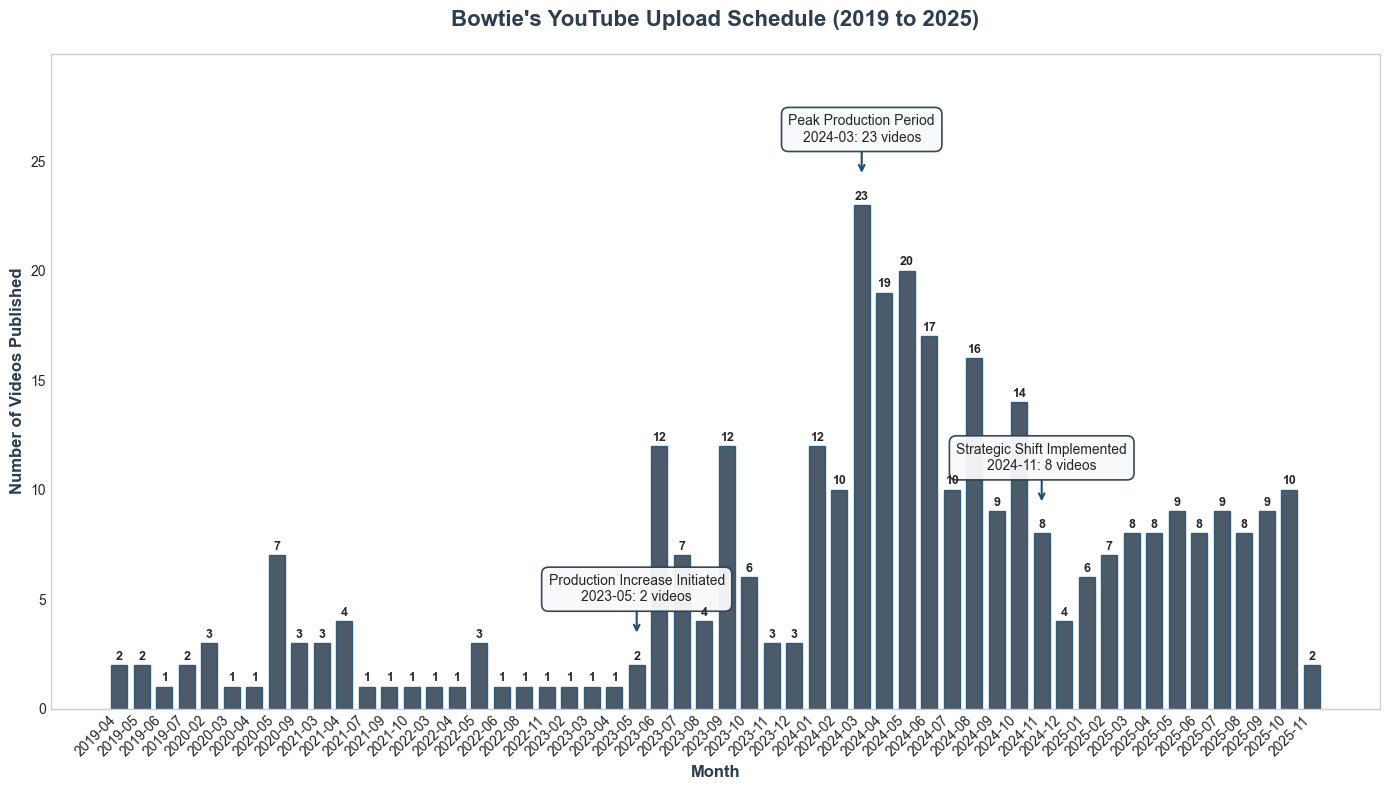

In [9]:
# Create figure with professional styling
fig1, ax1 = plt.subplots(figsize=(14, 8))

# Prep and plot
df_time_series_plot = df_time_series.copy()
df_time_series_plot['publication_month_str'] = df_time_series_plot['publication_month'].dt.strftime('%Y-%m')

# Create the bar plot
bars = ax1.bar(
    df_time_series_plot['publication_month_str'],
    df_time_series_plot['video_count'],
    color='#2C3E50',  # Professional blue
    alpha=0.85,
    edgecolor='#1B4F72',  # Dark blue edge
    linewidth=1.0,
    width=0.7
)

# Professional annotation style parameters
ANNOTATION_STYLE = {
    'fontsize': 10,
    'ha': 'center',
    'va': 'center',
    'bbox': dict(boxstyle="round,pad=0.5", fc="#F8F9FA", ec="#2C3E50", lw=1.2, alpha=0.95),
    'arrowprops': dict(arrowstyle="->", color='#1B4F72', lw=1.5, shrinkA=0, shrinkB=5)
}

# Define a small upward offset for arrow start
arrow_offset = max(df_time_series_plot['video_count']) * 0.05

# Find the peak for annotation
peak_month_str = df_time_series_plot.loc[df_time_series_plot['video_count'].idxmax(), 'publication_month_str']
peak_value = df_time_series_plot['video_count'].max()
peak_idx = list(df_time_series_plot['publication_month_str']).index(peak_month_str)

# Peak annotation
ax1.annotate(
    f"Peak Production Period\n{peak_month_str}: {peak_value} videos",
    xy=(peak_idx, peak_value + arrow_offset),
    xytext=(peak_idx, peak_value + (peak_value * 0.15)),
    **ANNOTATION_STYLE
)

# Annotation for 2023-05: Start increase video production
if '2023-05' in df_time_series_plot['publication_month_str'].values:
    may_2023_idx = list(df_time_series_plot['publication_month_str']).index('2023-05')
    may_2023_count = df_time_series_plot.loc[may_2023_idx, 'video_count']
    
    ax1.annotate(
        f"Production Increase Initiated\n2023-05: {may_2023_count} videos",
        xy=(may_2023_idx, may_2023_count + arrow_offset),
        xytext=(may_2023_idx, may_2023_count + (peak_value * 0.15)),
        **ANNOTATION_STYLE
    )

# Annotation for 2024-11: Change strategy in video production
if '2024-11' in df_time_series_plot['publication_month_str'].values:
    nov_2024_idx = list(df_time_series_plot['publication_month_str']).index('2024-11')
    nov_2024_count = df_time_series_plot.loc[nov_2024_idx, 'video_count']
    
    ax1.annotate(
        f"Strategic Shift Implemented\n2024-11: {nov_2024_count} videos",
        xy=(nov_2024_idx, nov_2024_count + arrow_offset),
        xytext=(nov_2024_idx, nov_2024_count + (peak_value * 0.15)),
        **ANNOTATION_STYLE
    )

# Title and labels
ax1.set_title("Bowtie's YouTube Upload Schedule (2019 to 2025)", 
              fontsize=16, pad=20, fontweight='bold', color='#2C3E50')
ax1.set_xlabel("Month", fontsize=12, fontweight='bold', color='#2C3E50')
ax1.set_ylabel("Number of Videos Published", fontsize=12, fontweight='bold', color='#2C3E50')

# X-axis label rotation
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Adjust y-axis limit to accommodate annotations
max_count = df_time_series_plot['video_count'].max()
ax1.set_ylim(0, max_count * 1.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    if height > 0:
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.grid(False)  # Disable grid lines
plt.tight_layout()
plt.savefig('visualization/Bowtie YouTube Upload Schedule.png', dpi=300, bbox_inches='tight') 
plt.show()

## What do Bowtie's audience actually excited about?

### [Correlation Testing] More videos mean more engagement?
More videos have negative effect to the engagement on bowties's channel
- When video count increases, Avg Views DECREASES slightly (r = -0.017)
- When video count increases, Avg Likes DECREASES moderately (r = -0.362)
- When video count increases, Avg Video Comments DECREASES moderately (r = -0.432)When video count increases, Avg Comments Per Video DECREASES moderately (r = -0.416)

In [10]:
query = """
SELECT
  TO_CHAR(v.published_at, 'YYYY-MM') AS month_year,
  COUNT(DISTINCT v.video_id) AS video_count,
  AVG(v.view_count) AS avg_views,
  AVG(v.like_count) AS avg_likes,
  AVG(v.comment_count) AS avg_video_comments, -- From videos table
  COALESCE(AVG(c.comment_count), 0) AS avg_comments_per_video, -- Handle no comments
  COALESCE(AVG(c.avg_vader_score), 0) AS avg_vader_score -- Handle no scores
FROM videos v
LEFT JOIN (
  SELECT
    video_id,
    COUNT(*) AS comment_count,
    COALESCE(AVG(vader_score), 0) AS avg_vader_score
  FROM comments
  GROUP BY video_id
) c ON v.video_id = c.video_id
WHERE v.channel_id = 'UCD5Lx-3KCYZzCzGF2A60STg'
  AND v.published_at >= '2024-01-01'::date
  AND v.published_at <= '2025-10-31'::date
GROUP BY TO_CHAR(v.published_at, 'YYYY-MM')
ORDER BY month_year ASC;
"""

with engine.connect() as conn:
    # Execute
    result = conn.execute(text(query))
  
    # Build DF with correct columns
    df_monthly = pd.DataFrame(result.fetchall(), columns=result.keys())

# Fix dtypes: convert numeric columns to float/int
numeric_cols = ['video_count', 'avg_views', 'avg_likes', 'avg_video_comments', 'avg_comments_per_video', 'avg_vader_score']
for col in numeric_cols:
    if col in df_monthly.columns:
        df_monthly[col] = pd.to_numeric(df_monthly[col], errors='coerce')

# Convert month_year to datetime and set as index
df_monthly['month_year'] = pd.to_datetime(df_monthly['month_year'])
df = df_monthly.set_index('month_year').sort_index()

#print("Bowtie Monthly Engagement Breakdown (2024):")
display(df.round(2))  

,video_count,avg_views,avg_likes,avg_video_comments,avg_comments_per_video,avg_vader_score
month_year,,,,,,
2024-01-01,12,18474.00,66.25,3.67,2.58,0.02
2024-02-01,10,51307.40,67.20,4.10,3.57,0.00
2024-03-01,23,205273.04,998.52,11.83,14.71,0.02
2024-04-01,19,16174.42,127.05,6.42,4.59,0.00
2024-05-01,20,9500.30,29.95,4.45,4.33,0.00
2024-06-01,17,4331.12,51.12,6.41,5.91,0.00
2024-07-01,10,1226.50,19.30,1.80,2.80,0.10
2024-08-01,16,13525.56,196.56,20.38,19.33,0.01
2024-09-01,9,119082.00,732.22,57.67,47.14,0.01


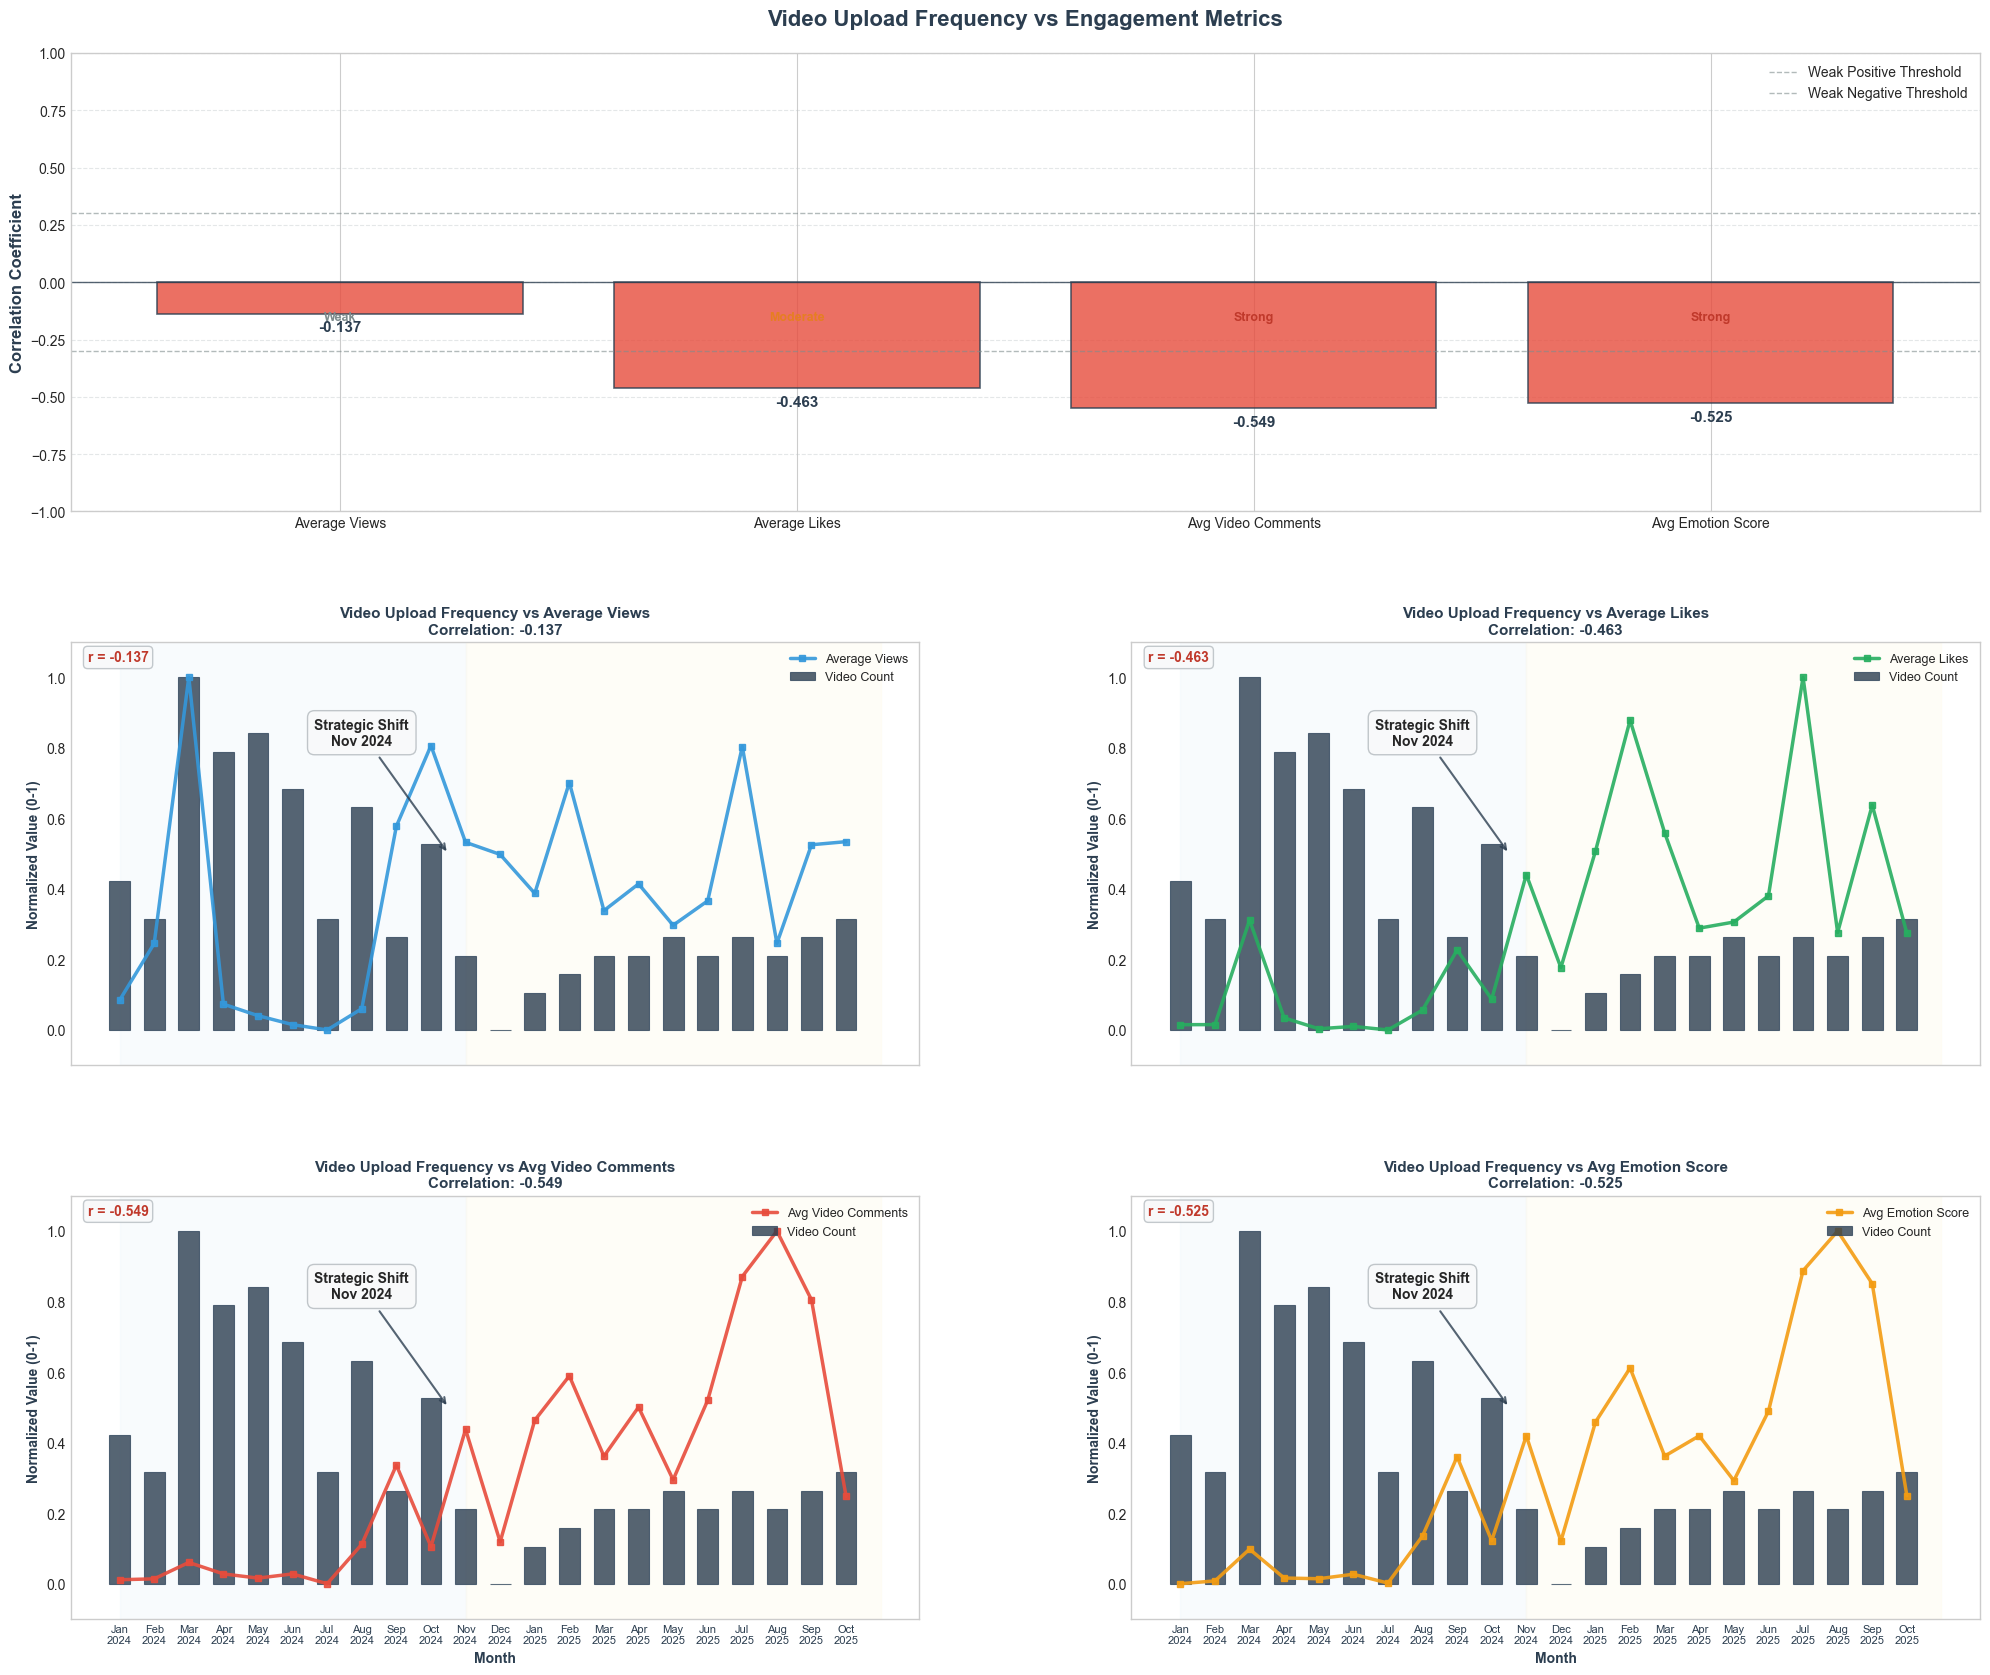


ENGAGEMENT CORRELATION SUMMARY:
• Views: Weak negative correlation (r = -0.137)
• Likes: Moderate negative correlation (r = -0.463)
• Video Comments: Strong negative correlation (r = -0.549)
• Comments Per Video: Strong negative correlation (r = -0.525)


In [11]:
fig2 = plt.figure(figsize=(20, 18))  # Slightly reduced height
gs = GridSpec(3, 2, figure=fig2, height_ratios=[1.3, 1.2, 1.2])

# PART 1: CORRELATION ANALYSIS
ax2 = fig2.add_subplot(gs[0, :])
engagement_metrics = ['avg_views', 'avg_likes', 'avg_video_comments', 'avg_comments_per_video']
correlations = {}
for metric in engagement_metrics:
    corr = df_monthly['video_count'].corr(df_monthly[metric])
    correlations[metric] = corr

# Plot correlations with professional color scheme
metrics_display = ['Average Views', 'Average Likes', 'Avg Video Comments', 'Avg Emotion Score']
corr_values = [correlations[metric] for metric in engagement_metrics]
colors = ['#E74C3C' if val < 0 else '#27AE60' if val > 0.1 else '#F39C12' for val in corr_values]  # Red, green, orange
bars = ax2.bar(metrics_display, corr_values, color=colors, alpha=0.8, edgecolor='#2C3E50', linewidth=1.2)

# Professional title and label styling
ax2.set_title('Video Upload Frequency vs Engagement Metrics', 
              fontsize=16, fontweight='bold', pad=20, color='#2C3E50')
ax2.set_ylabel('Correlation Coefficient', fontsize=12, fontweight='bold', color='#2C3E50')
ax2.set_ylim(-1, 1)
ax2.axhline(y=0, color='#2C3E50', linestyle='-', alpha=0.8, linewidth=1)
ax2.axhline(y=0.3, color='#7F8C8D', linestyle='--', alpha=0.6, linewidth=1.0, label='Weak Positive Threshold')
ax2.axhline(y=-0.3, color='#7F8C8D', linestyle='--', alpha=0.6, linewidth=1.0, label='Weak Negative Threshold')
ax2.grid(axis='y', alpha=0.4, linestyle='--', color='#BDC3C7')

# Add value labels and significance indicators
for bar, val, metric in zip(bars, corr_values, engagement_metrics):
    height = bar.get_height()
    va = 'bottom' if height >= 0 else 'top'
    y_pos = height + 0.02 if height >= 0 else height - 0.03
    ax2.text(bar.get_x() + bar.get_width()/2, y_pos, f'{val:.3f}', 
             ha='center', va=va, fontweight='bold', fontsize=11, color='#2C3E50')
    
    # Add significance marker
    if abs(val) > 0.5:
        significance = "Strong"
        color = "#C0392B" if val < 0 else "#229954"
    elif abs(val) > 0.3:
        significance = "Moderate"
        color = "#E67E22" if val < 0 else "#17A589"
    else:
        significance = "Weak"
        color = "#7F8C8D"
    
    ax2.text(bar.get_x() + bar.get_width()/2, -0.15, significance, 
             ha='center', va='center', fontweight='bold', color=color, fontsize=9)

# Professional insight annotation
insight_text = "ANALYSIS: Negative correlations indicate potential trade-off between video quantity and engagement quality.\nHigher production frequency may dilute per-video audience interaction."
ax2.text(0.02, -0.85, insight_text, transform=ax2.transAxes, fontsize=11,
         style='italic', color='#2C3E50', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="#F8F9FA", alpha=0.9, edgecolor='#BDC3C7'))
ax2.legend(loc='upper right', framealpha=0.9)

# PART 2: NORMALIZED TIME SERIES COMPARISONS
def normalize_column(series):
    min_val = series.min()
    max_val = series.max()
    if max_val > min_val:
        return (series - min_val) / (max_val - min_val)
    else:
        return series * 0

# Prepare comparison data
df_comparison = df_monthly.copy()
df_comparison['month_year_dt'] = pd.to_datetime(df_comparison['month_year'].astype(str) + '-01')
df_comparison = df_comparison.set_index('month_year_dt')
df_comparison['video_count_norm'] = normalize_column(df_comparison['video_count'])
df_comparison['avg_views_norm'] = normalize_column(df_comparison['avg_views'])
df_comparison['avg_likes_norm'] = normalize_column(df_comparison['avg_likes'])
df_comparison['avg_video_comments_norm'] = normalize_column(df_comparison['avg_video_comments'])
df_comparison['avg_comments_per_video_norm'] = normalize_column(df_comparison['avg_comments_per_video'])

# Find split position for background shading
split_date = pd.to_datetime('2024-11-01')
after_split = df_comparison[df_comparison.index >= split_date]
if not after_split.empty:
    split_idx = df_comparison.index.get_loc(after_split.index[0])
else:
    split_idx = len(df_comparison)
split_pos = split_idx

# Create subplots for comparisons
axes = [
    fig2.add_subplot(gs[1, 0]),
    fig2.add_subplot(gs[1, 1]),
    fig2.add_subplot(gs[2, 0]),
    fig2.add_subplot(gs[2, 1])
]

# Configuration for each subplot - professional color scheme
plot_configs = [
    ('avg_views_norm', 'Average Views', '#3498DB', correlations['avg_views']),  # Blue
    ('avg_likes_norm', 'Average Likes', '#27AE60', correlations['avg_likes']),  # Green
    ('avg_video_comments_norm', 'Avg Video Comments', '#E74C3C', correlations['avg_video_comments']),  # Red
    ('avg_comments_per_video_norm', 'Avg Emotion Score', '#F39C12', correlations['avg_comments_per_video'])  # Orange
]

# Plot each comparison
x_pos = np.arange(len(df_comparison))
for idx, (metric_col, metric_name, color, corr) in enumerate(plot_configs):
    ax = axes[idx]
    
    # Add subtle background shading
    ax.axvspan(0, split_pos, color='#EBF5FB', alpha=0.3)  # Very light blue
    ax.axvspan(split_pos, len(df_comparison), color='#FEF9E7', alpha=0.3)  # Very light yellow
    
    # Plot video count as bars
    bars = ax.bar(x_pos, df_comparison['video_count_norm'], 
                  label='Video Count', color='#2C3E50', alpha=0.8, width=0.6, 
                  edgecolor='#34495E', linewidth=0.8)
    
    # Plot the metric as line
    ax.plot(x_pos, df_comparison[metric_col], label=metric_name, 
            color=color, linewidth=2.5, marker='s', markersize=5, alpha=0.9)
    
    # Professional annotation
    if 0 < split_pos < len(df_comparison):
        annotation_text = "Strategic Shift\nNov 2024"
        ax.annotate(annotation_text, 
                    xy=(split_pos - 0.5, 0.5),
                    xytext=(split_pos - 3, 0.8),
                    arrowprops=dict(arrowstyle='->', color='#2C3E50', lw=1.5, alpha=0.8),
                    fontsize=10, ha='center', va='bottom', fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.5", facecolor="#F8F9FA", alpha=0.95, edgecolor='#BDC3C7'),
                    transform=ax.transData)
    
    # Professional subplot styling
    ax.set_title(f'Video Upload Frequency vs {metric_name}\nCorrelation: {corr:.3f}', 
                 fontweight='bold', fontsize=11, color='#2C3E50')
    ax.set_ylabel('Normalized Value (0-1)', fontsize=10, fontweight='bold', color='#2C3E50')
    ax.legend(fontsize=9, loc='upper right', framealpha=0.9)
    ax.grid(False)  # Disable grid lines
    ax.set_ylim(-0.1, 1.1)
    
    # X-axis formatting
    if idx >= 2:
        ax.set_xticks(x_pos)
        ax.set_xticklabels([month.strftime('%b\n%Y') for month in df_comparison.index],
                          fontsize=8, rotation=0, color='#2C3E50')
        ax.set_xlabel('Month', fontsize=10, fontweight='bold', color='#2C3E50')
    else:
        ax.set_xticks([])
        ax.tick_params(axis='x', which='both', bottom=False, top=False)
    
    # Professional correlation indicator
    correlation_color = '#C0392B' if corr < 0 else '#27AE60' if corr > 0.3 else '#F39C12'
    ax.text(0.02, 0.98, f'r = {corr:.3f}', transform=ax.transAxes,
            fontsize=10, fontweight='bold', va='top', color=correlation_color,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="#F8F9FA", alpha=0.9, edgecolor='#BDC3C7'))

# Final professional touches
plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.3, wspace=0.25, bottom=0.08)
plt.grid(False)  # Disable grid lines
plt.savefig('visualization/Video Upload Frequency vs Engagement Metrics.png', dpi=300, bbox_inches='tight') 
plt.show()

# =============================================================================
# ADDITIONAL INSIGHTS SUMMARY
# =============================================================================

print("\nENGAGEMENT CORRELATION SUMMARY:")
for metric, corr in correlations.items():
    metric_name = metric.replace('avg_', '').replace('_', ' ').title()
    strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
    direction = "negative" if corr < 0 else "positive"
    print(f"• {metric_name}: {strength} {direction} correlation (r = {corr:.3f})")

### 2b. [Correlation Testing] Longer videos mean more engagement?

In [12]:
query = """
SELECT 
    AVG(v.duration) AS avg_duration_seconds,
    AVG(v.duration)/60 AS avg_duration_minutes
FROM videos v
WHERE v.channel_id = 'UCD5Lx-3KCYZzCzGF2A60STg'
;

"""

with engine.connect() as conn:
    # Execute
    result = conn.execute(text(query))
  
    # Build DF with correct columns
    df_monthly = pd.DataFrame(result.fetchall(), columns=result.keys())

df = df_monthly.copy()
display(df.round(2))

,avg_duration_seconds,avg_duration_minutes
0,559.9526627218934911,9.3325443786982249


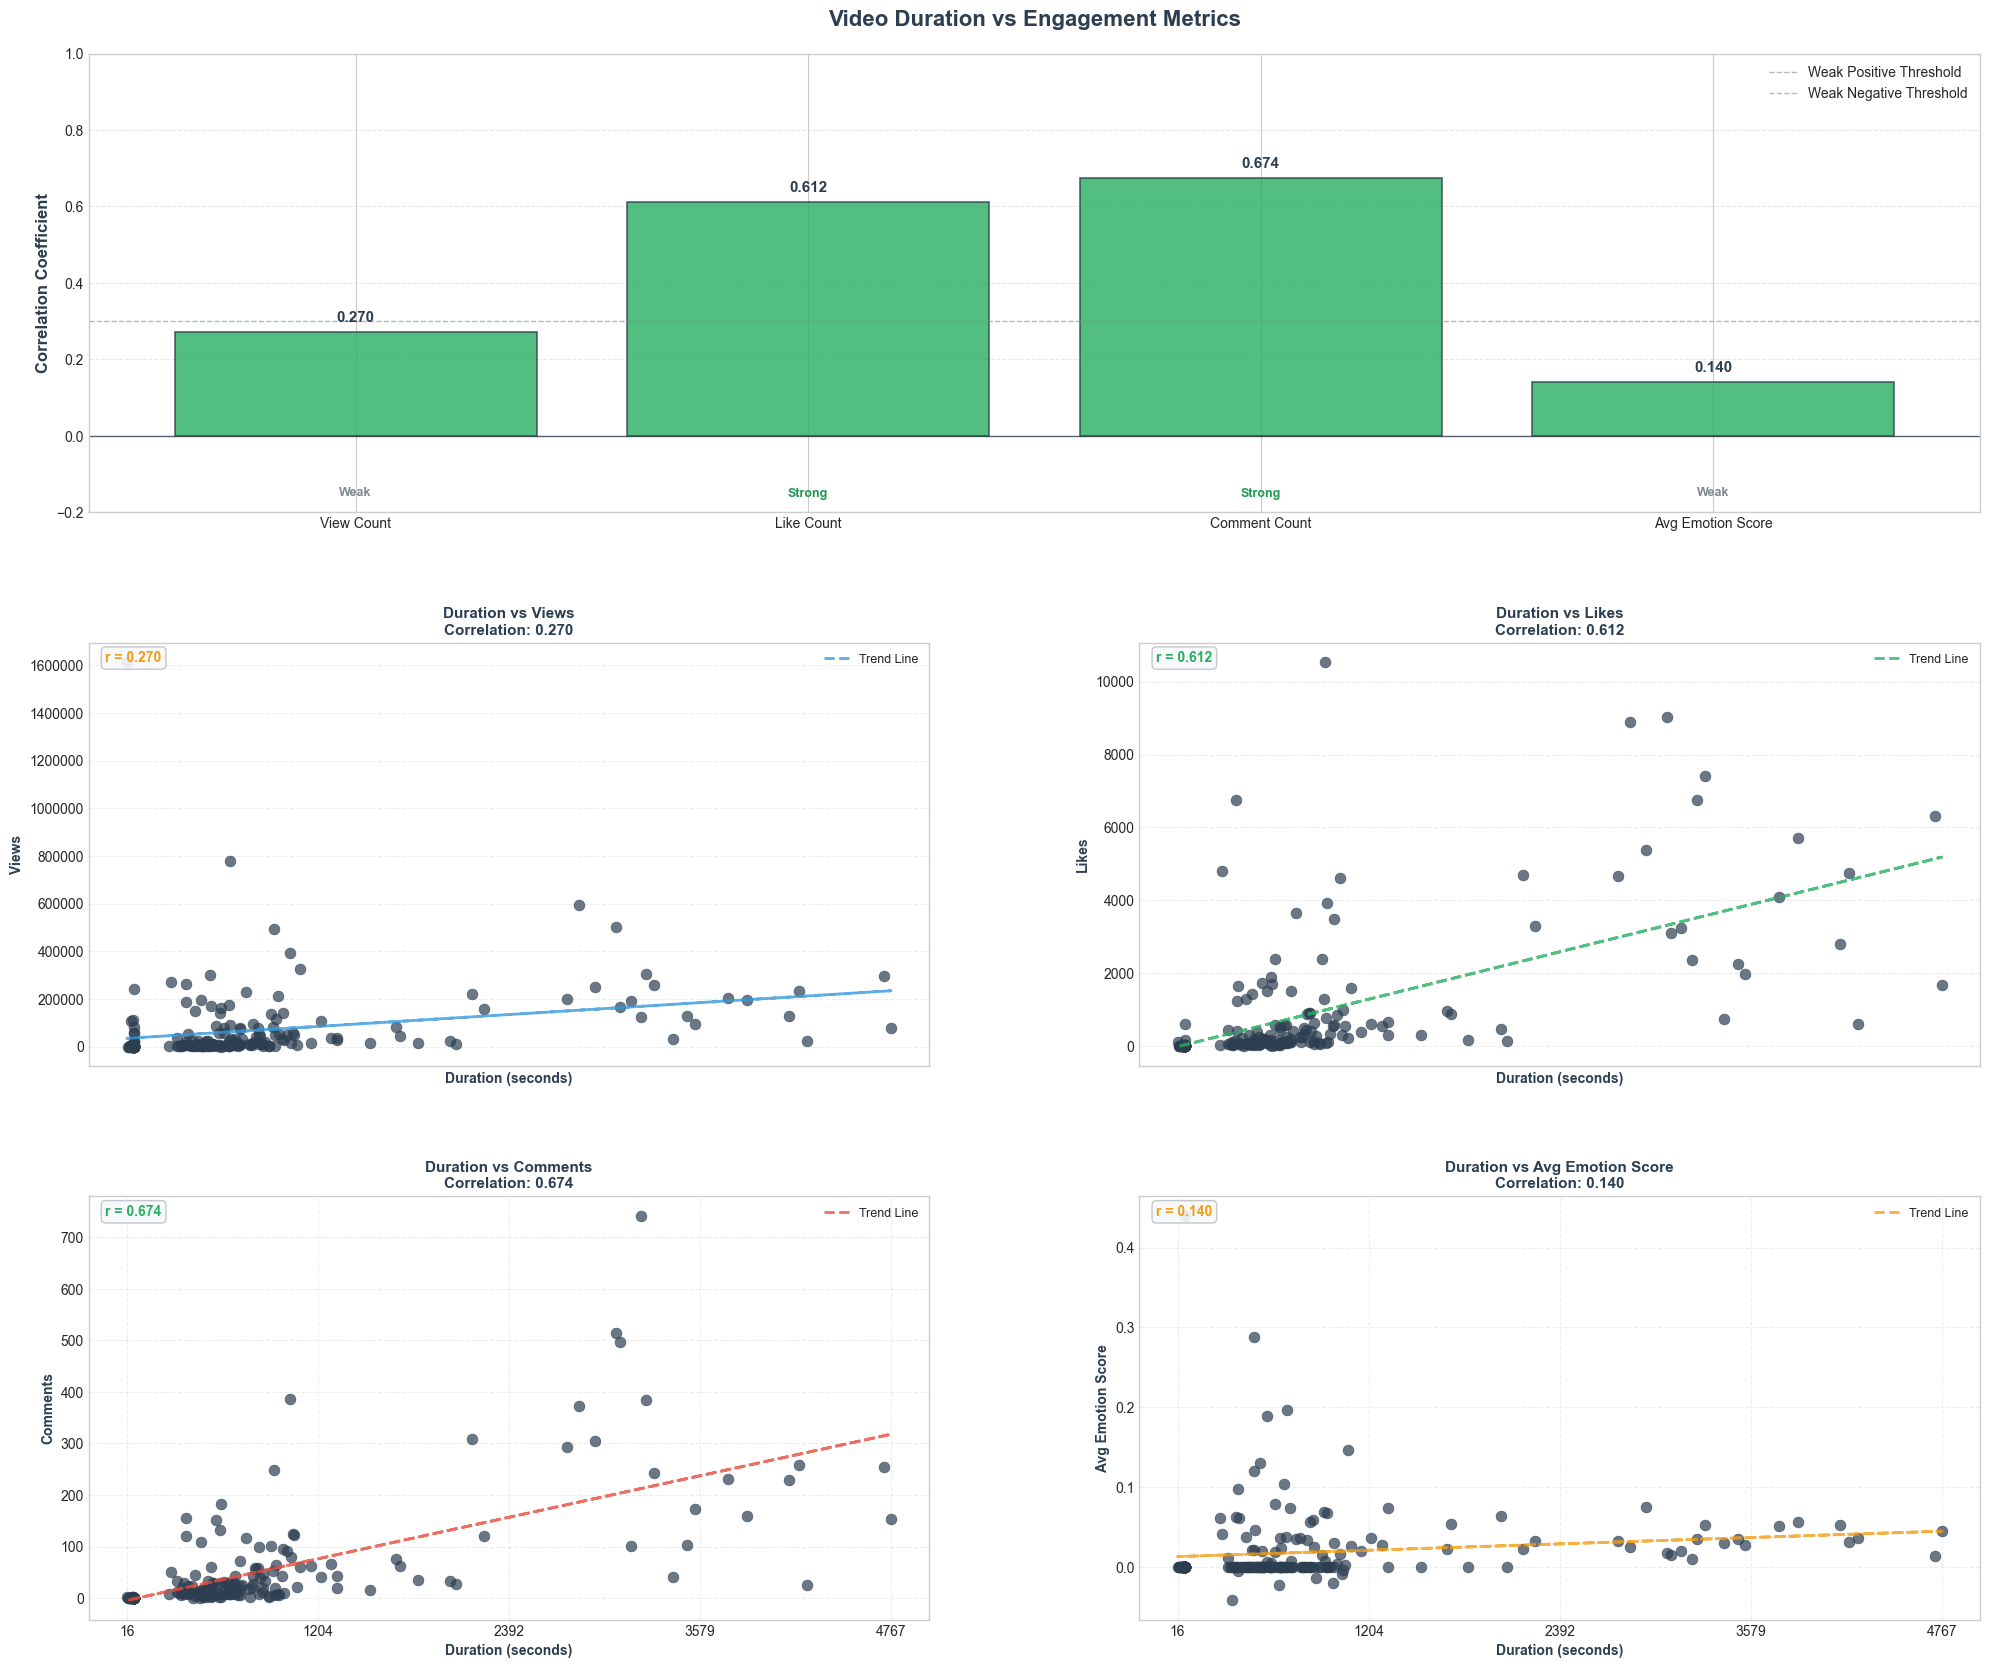


ENGAGEMENT CORRELATION SUMMARY:
• View: Weak positive correlation (r = 0.270)
• Like: Strong positive correlation (r = 0.612)
• Comment: Strong positive correlation (r = 0.674)
• Vader_Score: Weak positive correlation (r = 0.140)


In [13]:
# Query
query_videos = """
SELECT * 
FROM videos v
WHERE v.channel_id = 'UCD5Lx-3KCYZzCzGF2A60STg'
  AND v.published_at >= '2024-01-01'::date
  AND v.published_at <= '2025-10-31'::date
;
"""

try:
    with engine.connect() as conn:
        result_videos = conn.execute(text(query_videos))
        df_videos = pd.DataFrame(result_videos.fetchall(), columns=result_videos.keys())
    #print(f"Loaded {len(df_videos)} videos.")
except SQLAlchemyError as e:
    print(f"SQL Error for videos: {e}")
    df_videos = pd.DataFrame()  # Empty if error

if len(df_videos) == 0:
    print("No video data loaded. Check your query/channel_id.")
else:
    # For emotion score: Query avg vader_score per video (join comments)
    query_sentiment = """
    SELECT 
        v.video_id,
        v.duration,
        v.published_at,
        AVG(c.vader_score) AS avg_vader_score
    FROM videos v
    LEFT JOIN comments c ON v.video_id = c.video_id
    WHERE v.channel_id = 'UCD5Lx-3KCYZzCzGF2A60STg'
      AND v.published_at >= '2024-01-01'::date
      AND v.published_at <= '2025-10-31'::date
    GROUP BY v.video_id, v.duration, v.published_at
    ORDER BY v.published_at DESC;
    """
    
    try:
        with engine.connect() as conn:
            result_sentiment = conn.execute(text(query_sentiment))
            df_sentiment = pd.DataFrame(result_sentiment.fetchall(), columns=result_sentiment.keys())
        #print(f"Loaded sentiment data for {len(df_sentiment)} videos.")
    except SQLAlchemyError as e:
        print(f"SQL Error for sentiment: {e}")
        df_sentiment = pd.DataFrame()
    
    # Merge sentiment into videos df (handle missing sentiment as NaN)
    df = df_videos.merge(df_sentiment[['video_id', 'avg_vader_score']], on='video_id', how='left')
    
    # FIX: Convert Decimal columns to float to avoid TypeError in pearsonr
    numeric_cols = ['view_count', 'like_count', 'comment_count', 'duration', 'avg_vader_score']
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Converts Decimal/int to float, NaN on fail
    
    # Clean data: Drop rows with NaN in key columns
    df_clean = df.dropna(subset=['duration', 'view_count', 'like_count', 'comment_count', 'avg_vader_score'])
    
    if len(df_clean) < 2:
        print("Insufficient clean data for plotting (need >=2 rows).")
    else:
        # Calculate correlations for bar plot
        metrics = ['view_count', 'like_count', 'comment_count', 'avg_vader_score']
        correlations = {}
        for metric in metrics:
            corr_coef, _ = pearsonr(df_clean['duration'], df_clean[metric])
            correlations[metric] = corr_coef
        
        # Set style for plots
        sns.set_style("whitegrid")
        
        # Create combined figure with GridSpec: Bar on top (taller), 2x2 scatters below (equal heights)
        fig = plt.figure(figsize=(20, 18))  # Larger size to match second code
        gs = GridSpec(3, 2, figure=fig, height_ratios=[1.3, 1.2, 1.2])  # Uneven heights for bar emphasis
        
        # PART 1: CORRELATION ANALYSIS (Bar Plot on Top)
        ax_bar = fig.add_subplot(gs[0, :])  # Full width top row
        metrics_display = ['View Count', 'Like Count', 'Comment Count', 'Avg Emotion Score']
        corr_values = [correlations[metric] for metric in metrics]
        colors = ['#E74C3C' if val < 0 else '#27AE60' if val > 0.1 else '#F39C12' for val in corr_values]  # Red, green, orange
        bars = ax_bar.bar(metrics_display, corr_values, color=colors, alpha=0.8, edgecolor='#2C3E50', linewidth=1.2)
        
        # Professional title and label styling
        ax_bar.set_title('Video Duration vs Engagement Metrics', 
                         fontsize=16, fontweight='bold', pad=20, color='#2C3E50')
        ax_bar.set_ylabel('Correlation Coefficient', fontsize=12, fontweight='bold', color='#2C3E50')
        ax_bar.set_ylim(-0.2, 1.0)
        ax_bar.axhline(y=0, color='#2C3E50', linestyle='-', alpha=0.8, linewidth=1)
        ax_bar.axhline(y=0.3, color='#7F8C8D', linestyle='--', alpha=0.6, linewidth=1.0, label='Weak Positive Threshold')
        ax_bar.axhline(y=-0.3, color='#7F8C8D', linestyle='--', alpha=0.6, linewidth=1.0, label='Weak Negative Threshold')
        ax_bar.grid(axis='y', alpha=0.4, linestyle='--', color='#BDC3C7')
        
        # Add value labels and significance indicators
        for bar, val, metric in zip(bars, corr_values, metrics):
            height = bar.get_height()
            va = 'bottom' if height >= 0 else 'top'
            y_pos = height + 0.02 if height >= 0 else height - 0.03
            ax_bar.text(bar.get_x() + bar.get_width()/2, y_pos, f'{val:.3f}', 
                        ha='center', va=va, fontweight='bold', fontsize=11, color='#2C3E50')
            
            # Add significance marker
            if abs(val) > 0.5:
                significance = "Strong"
                color_sig = "#C0392B" if val < 0 else "#229954"
            elif abs(val) > 0.3:
                significance = "Moderate"
                color_sig = "#E67E22" if val < 0 else "#17A589"
            else:
                significance = "Weak"
                color_sig = "#7F8C8D"
            
            ax_bar.text(bar.get_x() + bar.get_width()/2, -0.15, significance, 
                        ha='center', va='center', fontweight='bold', color=color_sig, fontsize=9)
        
        # Professional insight annotation
        #insight_text = "ANALYSIS: Moderate positive correlations with likes/comments suggest longer videos foster deeper discussions in finance content.\nWeak sentiment link implies duration doesn't sway emotional tone much."
        #ax_bar.text(0.02, -0.85, insight_text, transform=ax_bar.transAxes, fontsize=11,
        #            style='italic', color='#2C3E50', 
        #            bbox=dict(boxstyle="round,pad=0.5", facecolor="#F8F9FA", alpha=0.9, edgecolor='#BDC3C7'))
        ax_bar.legend(loc='upper right', framealpha=0.9)
        
        # PART 2: SCATTER PLOTS WITH TREND LINES (2x2 Grid Below)
        # Configuration for each subplot - professional color scheme (colors now only for trendline if needed, dots uniform)
        plot_configs = [
            ('view_count', 'Views', '#3498DB', correlations['view_count']),  # Blue (unused for dots)
            ('like_count', 'Likes', '#27AE60', correlations['like_count']),  # Green (unused for dots)
            ('comment_count', 'Comments', '#E74C3C', correlations['comment_count']),  # Red (unused for dots)
            ('avg_vader_score', 'Avg Emotion Score', '#F39C12', correlations['avg_vader_score'])  # Orange (unused for dots)
        ]
        
        # Create subplots for scatters
        axes = [
            fig.add_subplot(gs[1, 0]),
            fig.add_subplot(gs[1, 1]),
            fig.add_subplot(gs[2, 0]),
            fig.add_subplot(gs[2, 1])
        ]
        
        # Plot each scatter with trendline
        for idx, (metric_col, metric_name, color, corr) in enumerate(plot_configs):
            ax = axes[idx]
            
            # Scatter points - all dots now uniform color '#2C3E50'
            scatter = ax.scatter(df_clean['duration'], df_clean[metric_col], 
                                 alpha=0.7, color='#2C3E50', s=60, edgecolor='#2C3E50', linewidth=0.5)
            
            # Add trendline (linear fit) - using subplot color for variety
            z = np.polyfit(df_clean['duration'], df_clean[metric_col], 1)
            p = np.poly1d(z)
            ax.plot(df_clean['duration'], p(df_clean['duration']), color=color, 
                    linestyle='--', linewidth=2, alpha=0.8, label='Trend Line')
            
            # Professional subplot styling
            ax.set_title(f'Duration vs {metric_name}\nCorrelation: {corr:.3f}', 
                         fontweight='bold', fontsize=11, color='#2C3E50')
            ax.set_xlabel('Duration (seconds)', fontsize=10, fontweight='bold', color='#2C3E50')
            ax.set_ylabel(metric_name, fontsize=10, fontweight='bold', color='#2C3E50')
            ax.ticklabel_format(style='plain', axis='y')  # Avoid scientific notation
            ax.grid(axis='both', alpha=0.3, linestyle='--', color='#BDC3C7')
            ax.legend(fontsize=9, loc='upper right', framealpha=0.9)
            
            # X-axis formatting (labels only on bottom row)
            if idx >= 2:
                ax.set_xticks(np.linspace(df_clean['duration'].min(), df_clean['duration'].max(), 5))
                ax.set_xlabel('Duration (seconds)', fontsize=10, fontweight='bold', color='#2C3E50')
            else:
                ax.set_xticks([])
                ax.tick_params(axis='x', which='both', bottom=False, top=False)
            
            # Professional correlation indicator
            correlation_color = '#C0392B' if corr < 0 else '#27AE60' if corr > 0.3 else '#F39C12'
            ax.text(0.02, 0.98, f'r = {corr:.3f}', transform=ax.transAxes,
                    fontsize=10, fontweight='bold', va='top', color=correlation_color,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="#F8F9FA", alpha=0.9, edgecolor='#BDC3C7'))
        
        # Final professional touches
        #fig.suptitle('Video Duration vs Engagement Metrics (Bowtie Channel, 2024-2025)', fontsize=18, fontweight='bold', y=0.98)
        plt.tight_layout()
        plt.subplots_adjust(top=0.95, hspace=0.3, wspace=0.25, bottom=0.08)
        plt.savefig('visualization/Video Duration vs Engagement Metrics.png', dpi=300, bbox_inches='tight') 
        plt.show()
        
        # ADDITIONAL INSIGHTS SUMMARY
        print("\nENGAGEMENT CORRELATION SUMMARY:")
        for metric, corr in correlations.items():
            metric_name = metric.replace('_count', '').replace('avg_', '').title()
            strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
            direction = "negative" if corr < 0 else "positive"
            print(f"• {metric_name}: {strength} {direction} correlation (r = {corr:.3f})")

## How many comments Bowtie has?

In [14]:
query = """
SELECT
  COUNT(DISTINCT c.comment_id) AS total_comments
FROM comments c
JOIN videos v ON c.video_id = v.video_id
WHERE v.channel_id = 'UCD5Lx-3KCYZzCzGF2A60STg'
"""

with engine.connect() as conn:
    # Execute
    result = conn.execute(text(query))
    
    # Fetch and build DF
    df_monthly = pd.DataFrame(result.fetchall(), columns=result.keys())
    print(df_monthly)  # Outputs a DataFrame with one row/column

   total_comments
0            8004


## Do more tags increase visibility?

Success! Fetched 338 videos.
      video_id                channel_id           channel_name  \
0  yyZVVi07oEU  UCD5Lx-3KCYZzCzGF2A60STg  Bowtie Insurance 保泰人壽   
1  tEoC8aiTD34  UCD5Lx-3KCYZzCzGF2A60STg  Bowtie Insurance 保泰人壽   
2  pm8wTYBP9-4  UCD5Lx-3KCYZzCzGF2A60STg  Bowtie Insurance 保泰人壽   
3  _kbMsIsugbg  UCD5Lx-3KCYZzCzGF2A60STg  Bowtie Insurance 保泰人壽   
4  WVrccSRYCmM  UCD5Lx-3KCYZzCzGF2A60STg  Bowtie Insurance 保泰人壽   

                                               title        published_at  \
0  日本藥妝店 去水腫 保健食品 = 智商稅 ？｜實測 5秒 水腫測試 皮膚凹陷 可能係 大病 ... 2025-11-06 11:01:05   
1  財務自由 都要面對 婚姻 危機 + 移民 困境 + 仔女 問題！揭開 我要做富翁 3大掙扎！... 2025-11-04 10:30:45   
2  保險孤兒單 自救 Q&A | 1個真實個案 賠償＄0 收場！5成 保險代理 3年內消失！揭秘... 2025-10-30 11:01:42   
3  人生「 完結 」、「 圓滿 」定「 緣份 」 ？ 臨終 病人靠 前妻 照顧，善寧之家 院長 ... 2025-10-27 11:01:12   
4  朋友喪親，唔識安慰？講多錯多，不如學識「呢 3 招」｜善寧之家 院長 黃嘉然｜ #Bowti... 2025-10-24 11:01:01   

   view_count  like_count  comment_count  duration  
0       15354         323              8      1227  
1    

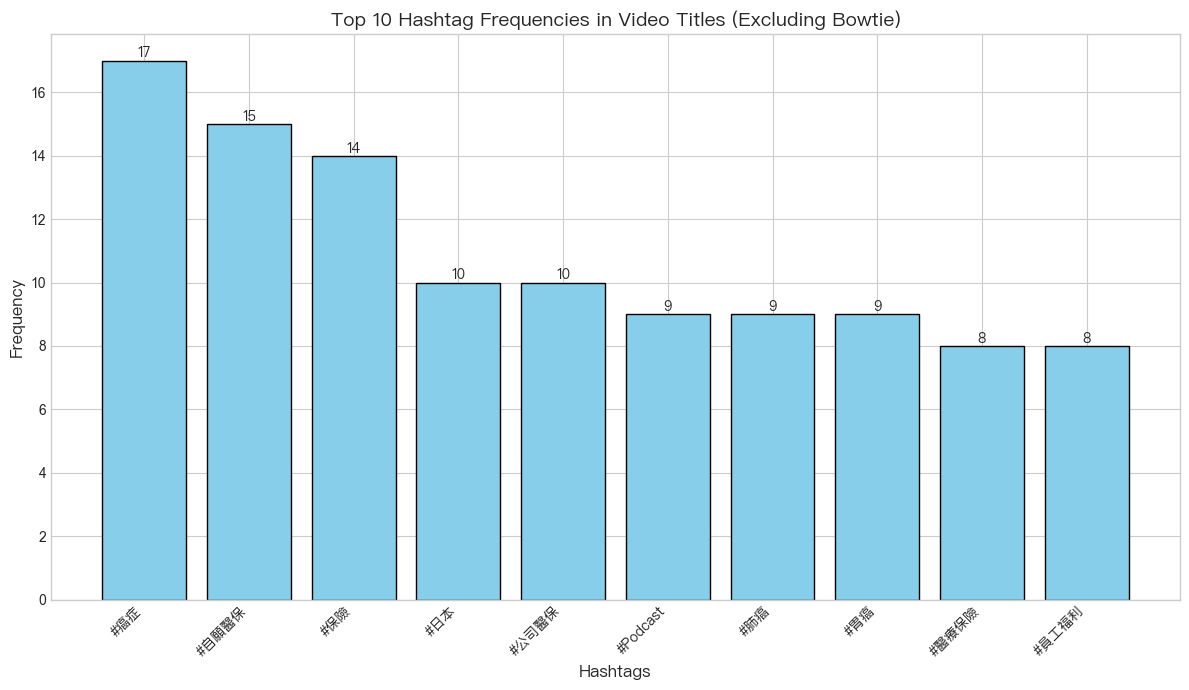

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import re
from sqlalchemy import text
from sqlalchemy.exc import SQLAlchemyError

# Your database connection setup (make sure engine is defined)
# from sqlalchemy import create_engine
# engine = create_engine('your_database_connection_string')

query = """
SELECT *
FROM videos v
WHERE v.channel_id = 'UCD5Lx-3KCYZzCzGF2A60STg'
ORDER BY v.published_at DESC;
"""

try:
    with engine.connect() as conn:
        result = conn.execute(text(query))
        df_monthly = pd.DataFrame(result.fetchall(), columns=result.keys())
    print(f"Success! Fetched {len(df_monthly)} videos.")
    print(df_monthly.head())  # Preview first 5 rows
    
    # Extract hashtags from titles
    def extract_hashtags(title):
        if pd.isna(title):
            return []
        return re.findall(r'#[^\s#]+', str(title))
    
    # Extract all hashtags across titles
    all_hashtags = [ht for title in df_monthly['title'] for ht in extract_hashtags(title)]
    
    # Counts (before filtering)
    total_occurrences = len(all_hashtags)
    unique_hashtags = set(all_hashtags)
    total_unique = len(unique_hashtags)
    titles_with_hashtags = sum(1 for title in df_monthly['title'] if extract_hashtags(title))
    
    print(f"\n--- Initial Hashtag Analysis (Before Filtering) ---")
    print(f"Total hashtag occurrences in titles: {total_occurrences}")
    print(f"Total unique hashtags: {total_unique}")
    print(f"Number of titles with at least one hashtag: {titles_with_hashtags}")
    
    # Filter out unwanted hashtags
    exclude_hashtags = {'#bowtie', '#Bowtie', '#bowtie保險', '#Bowtie保險'}
    
    def normalize_ht(ht):
        return ht.lower() if ht[1:].isascii() else ht
    
    filtered_hashtags = []
    for ht in all_hashtags:
        norm_ht = normalize_ht(ht)
        if norm_ht not in [normalize_ht(ex) for ex in exclude_hashtags]:
            filtered_hashtags.append(ht)
    
    # Recalculate after filtering
    if filtered_hashtags:
        hashtag_freq = pd.Series(filtered_hashtags).value_counts().head(10)
        print(f"\n--- Filtered Hashtag Analysis (Excluding #bowtie/#bowtie保險 variations) ---")
        print(f"Total hashtag occurrences (filtered): {len(filtered_hashtags)}")
        print(f"Top 10 most frequent hashtags:\n{hashtag_freq}")
        
        # Create figure and plot with proper font handling
        fig, ax = plt.subplots(figsize=(12, 7))
        
        # Try different font approaches
        try:
            # Try common Chinese fonts - macOS
            font_prop = FontProperties(fname='/System/Library/Fonts/PingFang.ttc')
            print("Using PingFang font (macOS)")
        except:
            try:
                # Try Windows Chinese fonts
                font_prop = FontProperties(fname='C:/Windows/Fonts/msyh.ttc')  # Microsoft YaHei
                print("Using Microsoft YaHei font (Windows)")
            except:
                try:
                    # Try another Windows font
                    font_prop = FontProperties(fname='C:/Windows/Fonts/simhei.ttf')  # SimHei
                    print("Using SimHei font (Windows)")
                except:
                    # Fallback to system default
                    font_prop = FontProperties()
                    print("Using system default font")
        
        # Create bar chart
        bars = ax.bar(range(len(hashtag_freq)), hashtag_freq.values, color='skyblue', edgecolor='black')
        ax.set_title('Top 10 Hashtag Frequencies in Video Titles (Excluding Bowtie)', fontproperties=font_prop, fontsize=14)
        ax.set_xlabel('Hashtags', fontproperties=font_prop, fontsize=12)
        ax.set_ylabel('Frequency', fontproperties=font_prop, fontsize=12)
        
        # Set x-tick labels with proper font
        ax.set_xticks(range(len(hashtag_freq)))
        ax.set_xticklabels(hashtag_freq.index, rotation=45, ha='right', fontproperties=font_prop)
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.01, 
                   str(int(height)), ha='center', va='bottom', fontproperties=font_prop)
        
        # Improve layout
        plt.tight_layout()
        
        # Display the plot
        plt.show()
        
        # Optional: Save the plot
        # plt.savefig('hashtag_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
        # print("Plot saved as 'hashtag_analysis.png'")
        
    else:
        print("No hashtags left after filtering!")
        
except SQLAlchemyError as e:
    print(f"SQL Error: {e}")
except KeyError as e:
    print(f"Error: Column not found - {e}. Available columns: {df_monthly.columns if 'df_monthly' in locals() else 'N/A'}")
except Exception as e:
    print(f"Unexpected error: {e}")